In [1]:
import numpy as np
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord
from astropy.coordinates import EarthLocation
import pytz
%matplotlib inline
from astroplan import Observer, FixedTarget
from astropy.utils.iers import conf
conf.auto_max_age = None
from astroplan import download_IERS_A 
from astropy.coordinates import get_sun, get_moon, get_body
from astroplan import moon_illumination

In [2]:
now=Time.now()

In [3]:
time_ist=now+5*u.h+30*u.min
print(time_ist)

2022-03-06 09:25:31.954904


In [4]:
download_IERS_A()

# Setting up Observatory Location

In [5]:
# 18.518774345496293 - latitude, 73.8147706 - longitude
longitude='73d48m53s'
latitude='18d31m7s'
elevation= 560 * u.m 
location=EarthLocation(longitude,latitude,elevation)

ioMIT=Observer(location=location,timezone='Asia/Kolkata',
               name='MIT-Telescope',description="GSO-Newtonian Telescope MIT World Peace University")

ioMIT


<Observer: name='MIT-Telescope',
    location (lon, lat, el)=(73.81472222222222 deg, 18.518611111111117 deg, 559.9999999994782 m),
    timezone=<DstTzInfo 'Asia/Kolkata' LMT+5:53:00 STD>>

In [6]:
#Calculating the sunset, midnight and sunrise times for our observatory 

sunset_ioMIT=ioMIT.sun_set_time(now,which='nearest')
even_twilight_ioMIT=ioMIT.twilight_evening_astronomical(now,which='nearest')
midnight_ioMIT=ioMIT.midnight(now,which='next')
morning_twilight_ioMIT=ioMIT.twilight_morning_astronomical(now,which='next')
sunrise_IOMIT=ioMIT.sun_rise_time(now,which='next')


In [7]:
# Effective time for astronomical observations

print((morning_twilight_ioMIT-even_twilight_ioMIT).to(u.h))

9.707685884088278 h


In [8]:
# Local Siderial Time
Local_siderial_time=ioMIT.local_sidereal_time(now)


In [9]:
# Andromeda / M32 cluster
coords = SkyCoord('00h42m41.8s', '+40d51m55.0s', frame='icrs') # coordinates of Andromeda Galaxy (M32) 
m32 = FixedTarget(name = 'M32', coord=coords)
m32.ra.hms

hms_tuple(h=0.0, m=42.0, s=41.799999999999926)

In [10]:
# to check if the target is up
print(ioMIT.target_is_up(even_twilight_ioMIT,m32))


True


In [11]:
aa = ioMIT.altaz(even_twilight_ioMIT, m32)
aa.alt.degree, aa.az.degree

# altitude and azimuth for the m32 cluster

(16.972455689332303, 308.38539284696327)

In [12]:
# rise time of the taget
m32rise=ioMIT.target_rise_time(now,m32,which='next',horizon=0*u.deg)
print(m32rise.iso)

2022-03-07 01:41:52.367


In [17]:
# Messier 51 cluster
target=FixedTarget.from_name('m51')
target.coord

<SkyCoord (ICRS): (ra, dec) in deg
    (202.469575, 47.1952583)>

## Moving Targets

In [18]:
get_body('jupiter',now)

<SkyCoord (GCRS: obstime=2022-03-06 03:55:31.954904, obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s): (ra, dec, distance) in (deg, deg, AU)
    (346.39341005, -6.88467458, 5.97180373)>

In [19]:
get_moon(now)

<SkyCoord (GCRS: obstime=2022-03-06 03:55:31.954904, obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s): (ra, dec, distance) in (deg, deg, AU)
    (26.40850338, 8.445647, 0.00261327)>

In [20]:
# moon illumination
moon_illumination(now)

0.13108193453352224

In [21]:
ioMIT.target_is_up(midnight_ioMIT,target)

True

In [22]:
target_altaz=ioMIT.altaz(midnight_ioMIT,target)
target_altaz

<SkyCoord (AltAz: obstime=2459645.3026676374, location=(1686530.03411708, 5810646.93191441, 2013073.50430603) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (37.30743817, 49.35156128)>

In [23]:
# Finding the airmass
target_altaz.secz

<Quantity 1.31800778>

In [24]:
import matplotlib.pyplot as plt
from astroplan.plots import plot_sky,plot_airmass

<PolarAxesSubplot:>

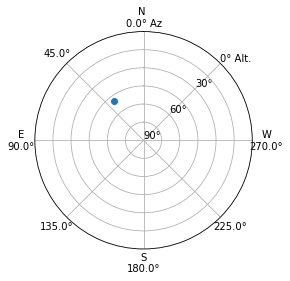

In [25]:
plot_sky(target,ioMIT,midnight_ioMIT)

<PolarAxesSubplot:>

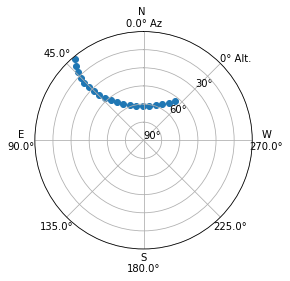

In [26]:
t_start=even_twilight_ioMIT
t_end=morning_twilight_ioMIT

t_observe=t_start+(t_end-t_start) * np.linspace(0.0,1.0,20)
plot_sky(target,ioMIT,t_observe)

C:\Python310\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


(4.0, 0.5)

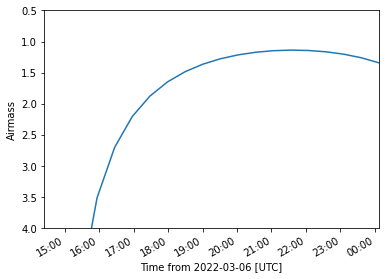

In [27]:
plot_airmass(target,ioMIT,t_observe)
plt.ylim(4,0.5)

In [28]:
from astroplan.plots import plot_finder_image
from astroquery.skyview import SkyView

(<WCSAxesSubplot:title={'center':'m51'}, xlabel='RA', ylabel='DEC'>,
 <astropy.io.fits.hdu.image.PrimaryHDU at 0x1e182b10340>)

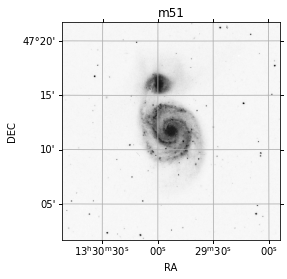

In [29]:
plot_finder_image(target, fov_radius = 20 * u.arcmin)  #field of view corresponding to the GROWTH-India telesocpe

## Working with an array of targets

In [33]:
target_names=['vega','polaris','m1','m42','m55']
targets=[FixedTarget.from_name(x) for x in target_names]
targets

[<FixedTarget "vega" at SkyCoord (ICRS): (ra, dec) in deg (279.23473479, 38.78368896)>,
 <FixedTarget "polaris" at SkyCoord (ICRS): (ra, dec) in deg (37.95456067, 89.26410897)>,
 <FixedTarget "m1" at SkyCoord (ICRS): (ra, dec) in deg (83.63311446, 22.01448714)>,
 <FixedTarget "m42" at SkyCoord (ICRS): (ra, dec) in deg (83.82208, -5.39111)>,
 <FixedTarget "m55" at SkyCoord (ICRS): (ra, dec) in deg (294.998792, -30.96475)>]

In [34]:
ioMIT.target_is_up(now,targets)

array([ True,  True, False, False,  True])

In [35]:
ioMIT.target_is_up(midnight_ioMIT,targets)

array([False,  True,  True,  True, False])

#### Finding when the targets are 10 degrees to the horizon

In [36]:
for target in targets:
    print(ioMIT.target_rise_time(now,target,which='next',horizon=10*u.deg).iso)

2022-03-06 20:36:18.891
--
2022-03-06 07:58:40.617
2022-03-06 08:34:38.835
2022-03-06 23:25:16.040


C:\Python310\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [37]:
ioMIT.altaz(now,targets[0]) # Current elevation of vega

<SkyCoord (AltAz: obstime=2022-03-06 03:55:31.954904, location=(1686530.03411708, 5810646.93191441, 2013073.50430603) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (327.27064519, 64.84407529)>

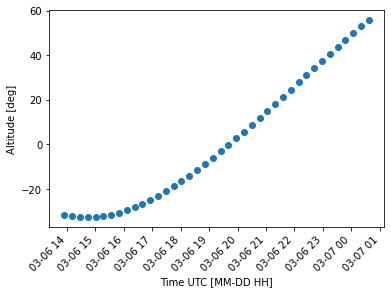

In [41]:
times = (t_start - 0.5 * u.h) + (t_end - t_start + 1 * u.h) * np.linspace(0.0, 1.0, 40)
elevations = ioMIT.altaz(times, targets[0]).alt
ax = plt.gca()
ax.plot_date(times.plot_date, elevations.deg)
ax.set(xlabel = 'Time UTC [MM-DD HH]' ,ylabel = 'Altitude [deg]')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


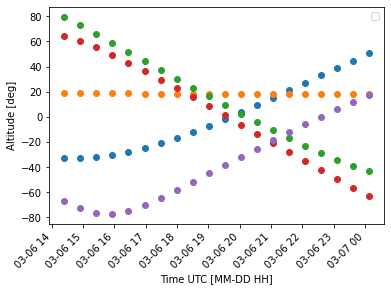

In [53]:
times = t_start + (t_end - t_start) * np.linspace(0.0, 1.0, 20)
elevations = []
for target in targets: 
    elevations.append(ioMIT.altaz(times, target).alt)
  
ax = plt.gca()
for elevation in elevations:
    ax.plot_date(times.plot_date, elevation)
    
ax.set(xlabel = 'Time UTC [MM-DD HH]' ,ylabel = 'Altitude [deg]')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.legend()

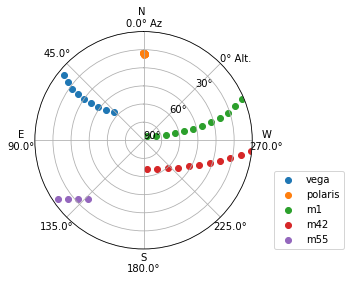

In [59]:
times=(t_start-0.5*u.h) + (t_end-t_start+1*u.h)*np.linspace(0.0,1.0,20)
for target in targets:
    plot_sky(target,ioMIT,times)
plt.legend(loc=[1.1,0])

C:\Python310\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
C:\Python310\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
C:\Python310\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
C:\Python310\lib\site-

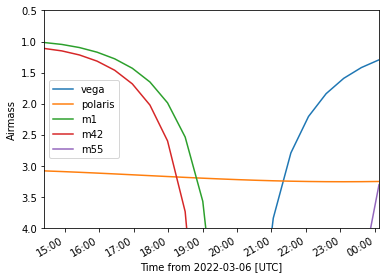

In [60]:
# airmass vs time
for target in targets:
    plot_airmass(target,ioMIT,t_observe)
plt.ylim(4,0.5)    
plt.legend()